In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
import pickle
import math

In [79]:

prefix = "/home/lemaker/open-source/Lab/SparkSQLAnalyticalModelCode/results/Auto-Executor/"
path=prefix+"Auto-Executor-TPC-DS-500GB-original.csv" # the raw data without the parameters a and b
df = pd.read_csv(path)  
df.head()


flag = True
for i in range(20,100):
    query_name = "Q"+str(i)        
    query_df = df[df["query"]==query_name]
    if not query_df.empty:
    
        train_x = query_df['executor_instances'].to_numpy().reshape(-1, 1)
        train_y = query_df['actual'].apply(np.log2).to_numpy().reshape(-1,1)


        model = LinearRegression() # 定义模型
        model.fit(train_x,train_y) # 训练模型
#         print("输出参数 log(a)：",model.coef_) # 输出模型参数w
#         print("输出参数 log(b)：",model.intercept_) # 输出参数b


        a_log = model.coef_[0][0]
        b_log = model.intercept_[0]
        a_log, b_log
        a = 2**a_log
        b = 2**b_log
        if math.isinf(b):
            continue
#         print("{} a is {}, b is {}".format(query_name,a,b))
        
        # choose the first row of query_df
        write_df = query_df.head(1)
#         write_df = query_df.loc[[0]]

        
        # append data frame to CSV file
        write_df['ae_pl_a'] = a
        write_df['ae_pl_b'] = b

        path=prefix+"Auto-Executor-TPC-DS-500GB-data.csv"
        # df.to_csv('GFG.csv', mode='a', index=False, header=False)
        if flag:
            write_df.to_csv(path)
            flag = False
        else:
            write_df.to_csv(path,mode='a',  header=False)
#         df.to_csv('GFG.csv', mode='a', index=False, header=False)

/tmp/ipykernel_790485/2762315331.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  write_df['ae_pl_a'] = a
/tmp/ipykernel_790485/2762315331.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  write_df['ae_pl_b'] = b
/tmp/ipykernel_790485/2762315331.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

/tmp/ipykernel_790485/2762315331.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  write_df['ae_pl_a'] = a
/tmp/ipykernel_790485/2762315331.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  write_df['ae_pl_b'] = b
/tmp/ipykernel_790485/2762315331.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

In [80]:
prefix = "/home/lemaker/open-source/Lab/SparkSQLAnalyticalModelCode/results/Auto-Executor/"
path=prefix+"Auto-Executor-TPC-DS-500GB-training-data.csv" # the file containing the resulted parameters a and b
df = pd.read_csv(path)  
df.head()

,Unnamed: 0,executor_instances,executor_cores,executor-memory (MB),input data size (MB),query,dag depth,dag width,stage_count,predicted_runtime(seconds),...,Expand,ExchangeHashpartitioning,ExchangeSinglePartition,ReusedExchange,Empty,TakeOrderedAndProject,CollectLimit,Error,ae_pl_a,ae_pl_b
0,8,10,2,4000,500,Q20,3,1,5,40,...,0,2,0,0,1,1,0,0,1.000000,47.000000
1,9,10,2,4000,500,Q21,2,1,5,32,...,0,1,0,0,0,1,0,0,1.008661,39.736480
2,10,10,2,4000,500,Q22,2,1,5,32,...,1,1,0,0,0,1,0,0,0.989183,73.380094
3,11,10,2,4000,500,Q25,4,3,11,339,...,0,5,0,0,0,1,0,0,0.972492,488.683174
4,12,10,2,4000,500,Q26,2,1,6,32,...,0,1,0,0,0,1,0,0,0.995381,55.120275


In [81]:
columns_list = list(df)
print(columns_list)

['Unnamed: 0', 'executor_instances', 'executor_cores', 'executor-memory (MB)', 'input data size (MB)', 'query', 'dag depth', ' dag width', 'stage_count', ' predicted_runtime(seconds)', 'actual', 'FileScan', 'Filter', 'BroadcastHashJoin', 'BroadcastExchange', 'HashAggregate', 'Project', 'Sort', 'SortMergeJoin', 'Subquery', 'Union', 'Expand', 'ExchangeHashpartitioning', 'ExchangeSinglePartition', 'ReusedExchange', 'Empty', 'TakeOrderedAndProject', 'CollectLimit', 'Error', 'ae_pl_a', 'ae_pl_b']


In [82]:
training_x = df[['FileScan', 'Filter', 'BroadcastHashJoin', 'BroadcastExchange', 'HashAggregate', 'Project', 'Sort', 'SortMergeJoin', 'Subquery', 'Union', 'Expand', 'ExchangeHashpartitioning', 'ExchangeSinglePartition', 'ReusedExchange', 'Empty', 'TakeOrderedAndProject', 'CollectLimit', 'Error']].to_numpy()
training_y = df[['ae_pl_a', 'ae_pl_b']].to_numpy()
training_x.shape, training_y.shape

((77, 18), (77, 2))

In [83]:
# use random forest regressor to fit the parameter model 
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor

# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
# Multi-Target Regression Using Scikit-Learn: A How-To Guide https://saturncloud.io/blog/multitarget-regression-using-scikitlearn-a-howto-guide/
# X, y = make_regression(n_features=4, n_informative=2,random_state=0, shuffle=False)
# X
# regr = RandomForestRegressor(max_depth=2, random_state=0)

max_depth = 30
regr_multirf = MultiOutputRegressor(
    RandomForestRegressor(n_estimators=10, max_depth=max_depth, random_state=0)
)
regr_multirf.fit(training_x, training_y)
# regr.fit(training_x, training_y)
# print(regr.predict([[0, 0, 0, 0]]))

MultiOutputRegressor(estimator=RandomForestRegressor(max_depth=30,
                                                     n_estimators=10,
                                                     random_state=0))

In [84]:

X_test=np.array([[12,14,4,4,8,10,12,7,0,0,0,16,0,0,0,1,0,0], #Q11 executor instances = 10, n=10
                 [3,3,2,2,2,4,1,0,0,0,0,2,0,0,1,1,0,0], # Q12
                 [6,6,5,5,1,7,0,0,0,0,0,0,1,0,0,0,0,1]  #Q13
                 ])
y_multirf = regr_multirf.predict(X_test) # predict the parameters a and b with regard to each query 
y_multirf
n = 10
for index, items in enumerate(y_multirf):
    print(index, items)
    a = items[0]
    b = items[1]
    t_n = b* (n**a)  # predict the runtime of the specfic query given the numer of excutor intance n and its corresponding parameters a and b
    print(" a is {} b is {} t_n is {}".format(a,b,t_n))


0 [  0.96458226 262.28712446]
 a is 0.9645822617023999 b is 262.2871244572783 t_n is 2417.459647467281
1 [ 1.00082788 47.28439829]
 a is 1.000827882749216 b is 47.2843982880825 t_n is 473.74621107793433
2 [ 0.99204992 58.19651647]
 a is 0.9920499156657847 b is 58.196516471760845 t_n is 571.4087745030888


In [120]:
# suggest the runtime by the resource configuration using the AE_PL model in the paper 

prefix = "/home/lemaker/open-source/Lab/SparkSQLAnalyticalModelCode/results/Auto-Executor/"
path=prefix+"Auto-Executor-TPC-DS-500GB-prediction-data.csv" # the raw data without the parameters a and b
df = pd.read_csv(path)  
df.head()

auto_executor_predctions = []
for index, row in df.iterrows():
#     print(f"Name: {row['name']}, Age: {row['age']}")
    
    x_numpy = row[['FileScan', 'Filter', 'BroadcastHashJoin', 'BroadcastExchange', 'HashAggregate', 'Project', 'Sort', 'SortMergeJoin', 'Subquery', 'Union', 'Expand', 'ExchangeHashpartitioning', 'ExchangeSinglePartition', 'ReusedExchange', 'Empty', 'TakeOrderedAndProject', 'CollectLimit', 'Error']].to_numpy()
    executor_instances = row['executor_instances']
    actual_runtime= float(row['actual'])
    query_name = row['query']
    x_numpy= x_numpy.reshape(-1, 1)
    x_numpy = x_numpy.T
    print(x_numpy.shape)
    

    y_multirf = regr_multirf.predict(x_numpy) # predict the parameters a and b with regard to each query 
    for index2, items in enumerate(y_multirf):
        print(index2, items)
        a = items[0]
        b = items[1]
        close_prediction_time = 100000000000
        close_executors=100000000000
        min_distance = 10**7
        for n in range(2,16,2):
            
            t_n = b* (n**a)  # predict the runtime of the specfic query given the numer of excutor intance n and its corresponding parameters a and b
            abs_distance = abs(t_n - actual_runtime)
            if abs_distance < min_distance:
                min_distance = abs_distance
                close_executors= n
                close_prediction_time = t_n
        print("query_name is {}, close executor_instances is {},  a is {} b is {} close predicted time is {}, actual_runtime is {}, min_distance is {}".format(query_name, close_executors, round(a,3),round(b,3),round(close_prediction_time,0),actual_runtime, round(min_distance,0)))
        auto_executor_predctions.append(close_prediction_time)
        
df["Auto-Exeuctor-prediction"]= auto_executor_predctions
df["Auto-Exeuctor_error"] = abs(df["actual"]-df["Auto-Exeuctor-prediction"])/df["actual"]
        

(1, 18)
0 [  0.96458226 262.28712446]
query_name is Q11, close executor_instances is 2,  a is 0.965 b is 262.287 close predicted time is 512.0, actual_runtime is 210.0, min_distance is 302.0
(1, 18)
0 [ 1.00082788 47.28439829]
query_name is Q12, close executor_instances is 2,  a is 1.001 b is 47.284 close predicted time is 95.0, actual_runtime is 46.0, min_distance is 49.0
(1, 18)
0 [ 0.99204992 58.19651647]
query_name is Q13, close executor_instances is 2,  a is 0.992 b is 58.197 close predicted time is 116.0, actual_runtime is 66.0, min_distance is 50.0
(1, 18)
0 [  0.96458543 176.27581985]
query_name is Q15, close executor_instances is 2,  a is 0.965 b is 176.276 close predicted time is 344.0, actual_runtime is 108.0, min_distance is 236.0
(1, 18)
0 [  0.9618518  116.57049787]
query_name is Q16, close executor_instances is 2,  a is 0.962 b is 116.57 close predicted time is 227.0, actual_runtime is 138.0, min_distance is 89.0
(1, 18)
0 [  0.99198903 323.93821366]
query_name is Q17, c

0 [  0.97489879 261.70455797]
query_name is Q77, close executor_instances is 2,  a is 0.975 b is 261.705 close predicted time is 514.0, actual_runtime is 108.0, min_distance is 406.0
(1, 18)
0 [  0.97902773 433.57858377]
query_name is Q78, close executor_instances is 2,  a is 0.979 b is 433.579 close predicted time is 855.0, actual_runtime is 384.0, min_distance is 471.0
(1, 18)
0 [ 0.97940377 93.05328751]
query_name is Q79, close executor_instances is 2,  a is 0.979 b is 93.053 close predicted time is 183.0, actual_runtime is 72.0, min_distance is 111.0
(1, 18)
0 [9.68241118e-01 1.01266272e+03]
query_name is Q80, close executor_instances is 2,  a is 0.968 b is 1012.663 close predicted time is 1981.0, actual_runtime is 576.0, min_distance is 1405.0
(1, 18)
0 [  1.00739338 148.89652862]
query_name is Q81, close executor_instances is 2,  a is 1.007 b is 148.897 close predicted time is 299.0, actual_runtime is 56.0, min_distance is 243.0
(1, 18)
0 [  0.96308379 117.11530382]
query_name is

In [121]:

 #append data frame to CSV file
    
prefix = "/home/lemaker/open-source/Lab/SparkSQLAnalyticalModelCode/results/Auto-Executor/"
path=prefix+"Auto-Executor-TPC-DS-500GB-prediction-final.csv"
    

df.to_csv(path)

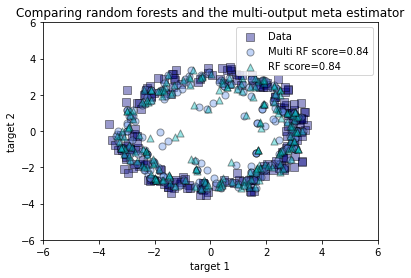

In [33]:
## The offical example of RandomForestRegeressor from the sklearn

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(200 * rng.rand(600, 1) - 100, axis=0)
y = np.array([np.pi * np.sin(X).ravel(), np.pi * np.cos(X).ravel()]).T
y += 0.5 - rng.rand(*y.shape)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=400, test_size=200, random_state=4
)

max_depth = 30
regr_multirf = MultiOutputRegressor(
    RandomForestRegressor(n_estimators=100, max_depth=max_depth, random_state=0)
)
regr_multirf.fit(X_train, y_train)

regr_rf = RandomForestRegressor(n_estimators=100, max_depth=max_depth, random_state=2)
regr_rf.fit(X_train, y_train)

# Predict on new data
y_multirf = regr_multirf.predict(X_test)
y_rf = regr_rf.predict(X_test)

# Plot the results
plt.figure()
s = 50
a = 0.4
plt.scatter(
    y_test[:, 0],
    y_test[:, 1],
    edgecolor="k",
    c="navy",
    s=s,
    marker="s",
    alpha=a,
    label="Data",
)
plt.scatter(
    y_multirf[:, 0],
    y_multirf[:, 1],
    edgecolor="k",
    c="cornflowerblue",
    s=s,
    alpha=a,
    label="Multi RF score=%.2f" % regr_multirf.score(X_test, y_test),
)
plt.scatter(
    y_rf[:, 0],
    y_rf[:, 1],
    edgecolor="k",
    c="c",
    s=s,
    marker="^",
    alpha=a,
    label="RF score=%.2f" % regr_rf.score(X_test, y_test),
)
plt.xlim([-6, 6])
plt.ylim([-6, 6])
plt.xlabel("target 1")
plt.ylabel("target 2")
plt.title("Comparing random forests and the multi-output meta estimator")
plt.legend()
plt.show()